In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import numpy as np

In [4]:
df = pd.read_csv('dataframe.csv')
df = df[df.framework=='rn']

In [5]:
def get_count_where_relative_percentage(dataframe: pd.DataFrame, limit) -> pd.Series:
    all_frames = dataframe.groupby(['execution_id'])['frame_id'].count()
    filtered = dataframe[dataframe.white_relative_percentage > limit]
    filtered = filtered.groupby(['execution_id'])['frame_id'].count()
    return filtered / all_frames

In [6]:
table = [['Maior que', 'Média', 'Desvio padrão']]
for limit in [0, 50, 90, 99]:
    filtered_df = get_count_where_relative_percentage(df, limit)
    mean = np.round(filtered_df.mean()*100, 2)
    std = np.round(filtered_df.std()*100, 2)
    table.append([f'{limit}%', f'{mean}%', f'{std}%'])

print(tabulate(table))

---------  ------  -------------
Maior que  Média   Desvio padrão
0%         27.97%  5.28%
50%        20.36%  4.63%
90%        12.95%  4.28%
99%        11.61%  4.14%
---------  ------  -------------


<AxesSubplot:xlabel='frame_id', ylabel='white_relative_percentage'>

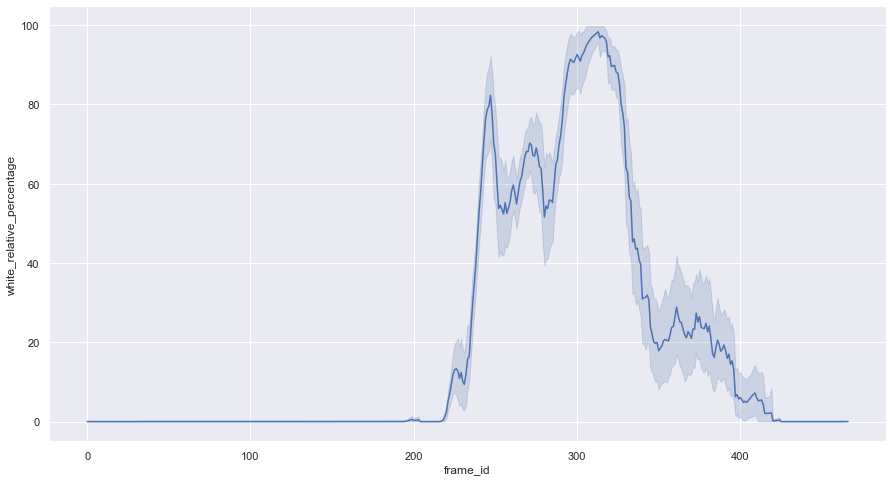

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df, x='frame_id', y='white_relative_percentage')